##  Bayes's Theorem 

### Bayes' theorem for 3 events and for 2 events

$ P(A\vert B\cap C)={\frac {P(B\vert A\cap C)\,P(A\vert C)}{P(B\vert C)}}$
$ P(A\vert B)={\frac {P(B\vert A)P(A)}{P(B)}}$

### for linear regression problem: put a straight line between feature variables X and label variable y that best fits the dataset

$y=X\beta+\epsilon$

Least Square (OLS) provides a closed-form estimation of coefficient. Python sklearn package can solve it

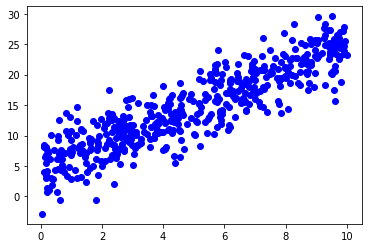

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sample_size = 500
sigma_e = 3.0             # true value of parameter error sigma
random_num_generator = np.random.RandomState(0)
x = 10.0 * random_num_generator.rand(sample_size)
e = random_num_generator.normal(0, sigma_e, sample_size)
y = 5.0 + 2.0 * x +  e          # a = 1.0; b = 5.0; y = a + b*x
plt.scatter(x, y, color='blue')

In [7]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
lm_model.fit(x.reshape(-1,1), y)        # fit() expects 2D array
print('pamameters: %.7f, %.7f' %(lm_model.intercept_, lm_model.coef_))

pamameters: 4.6565181, 2.0086851


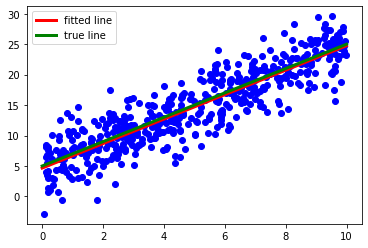

In [29]:
xfit = np.linspace(0, 10, sample_size)
yfit = lm_model.predict(xfit.reshape(-1,1))
ytrue = 2.0 * xfit + 5.0       # we know the true value of slope and intercept
plt.scatter(x, y, color='blue')
plt.plot(xfit, yfit, color='red', label='fitted line', linewidth=3)
plt.plot(xfit, ytrue, color='green', label='true line', linewidth=3)
plt.legend()

For this linear regression problem, Bayes's Theorem can be written as

$f(\beta|y,X)=\frac{f(y|\beta,X)f(\beta|X)}{f(y|X)} \\\\$
$y \sim N(X\beta, \sigma_eI) 
\beta \sim N(\beta_0, \Sigma_{\beta,0})$

$N(\beta_0, \Sigma_{\beta,0})$: prior distribution of parameter $\beta$ \
$N(X\beta, \sigma_eI)$: likelihood follows a normal distribution; 

$\\y=X\beta+\epsilon=a+bx+\epsilon $\
\begin{matrix}
\beta_0 &=& \begin{bmatrix} a_0 \\\\ b_0 \end{bmatrix} \\\\
\Sigma_{\beta,0} &=& \begin{bmatrix} \sigma_{a,0}^2 & 0 \\\\ 0 & \sigma_{b,0}^2 \end{bmatrix}
\end{matrix}

It mathematically proves that a normally distributed prior conjugates with normally distributed likelihood to produce a normally distributed posterior as

$\beta \sim N(\beta_1, \Sigma_{\beta,1})$

in Bayesian inference:

the simple case (known variance) where a Normal prior + Normal likelihood ⇒ Normal posterior, and

the usual conjugate-pair case for unknown variance where the Normal–Inverse-Gamma (N-IG) prior for $(\mu, \sigma^2)$ yields a posterior that is again Normal–Inverse-Gamma.

a normally distributed prior conjugates with normally distributed likelihood to produce a normally distributed posterior: $\beta \sim N(\beta_1, \Sigma_{\beta,1})$

after we observe two points $(x_1, y_1)$ and $(x_2, y_2)$

\begin{matrix}
\beta_1 &=& \Sigma_{\beta,1}(\Sigma_{\beta,0}^{-1}\beta_0+\Sigma_y^{-1}\mu_y)\\\\
\Sigma_{\beta,1} &=& (\Sigma_{\beta,0}^{-1} + \Sigma_{y}^{-1})^{-1}\\\\
\mu_y &=& \begin{bmatrix} \frac{x_1y_2-x_2y_1}{x_1-x_2} & \frac{y_1-y_2}{x_1-x_2} \end{bmatrix}^T    \\\\
\Sigma_{y} &=& \begin{bmatrix} [(\frac{x_1}{x_1-x_2})^2+(\frac{x_2}{x_1-x_2})^2]\sigma_e^2 & 0 \\\\ 0 & 2(\frac{1}{x_1-x_2})^2\sigma_e^2 \end{bmatrix}
\end{matrix}

then iterate this step

In [30]:
# initial belief
sigma_e = 3.0            # make variance known to avoid inverse gamma complexity
a_0 = 0.5
b_0 = 0.5
sigma_a_0 = 0.5
sigma_b_0 = 0.5
beta_0 = np.array([[a_0], [b_0]])
sigma_beta_0 = np.array([[sigma_a_0*sigma_a_0, 0], [0, sigma_b_0*sigma_b_0]])

In [31]:
beta_recorder = []           # record parameter beta
beta_recorder.append(beta_0)
for itr in range(250):       
    x1 = x[itr*2]
    x2 = x[itr*2+1]
    y1 = y[itr*2]
    y2 = y[itr*2+1]
    mu_y = np.array([[(x1*y2-x2*y1)/(x1-x2)], [(y1-y2)/(x1-x2)]])
    sigma_y = np.array([[(np.square(x1/(x1-x2))+np.square(x2/(x1-x2)))*np.square(sigma_e),0],[0,2*np.square(sigma_e/(x1-x2))]])
    sigma_beta_1 = np.linalg.inv(np.linalg.inv(sigma_beta_0)+np.linalg.inv(sigma_y))
    beta_1 = sigma_beta_1.dot(np.linalg.inv(sigma_beta_0).dot(beta_0) + np.linalg.inv(sigma_y).dot(mu_y))

    # assign beta_1 to beta_0
    beta_0 = beta_1
    sigma_beta_0 = sigma_beta_1
    beta_recorder.append(beta_0)

print('pamameters: %.7f, %.7f' %(beta_0[0], beta_0[1]))

pamameters: 3.3903053, 2.0135760


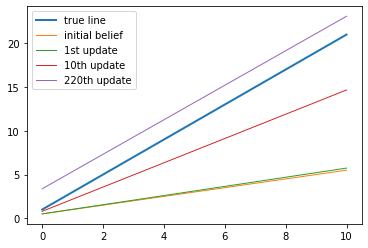

In [32]:
# plot the Beyesian dynamics
xfit = np.linspace(0, 10, sample_size)
ytrue = 2.0 * xfit + 1.0       # we know the true value of slope and intercept
plt.plot(xfit, ytrue, label='true line', linewidth=2)
y0 = beta_recorder[0][1] * xfit + beta_recorder[0][0]
plt.plot(xfit, y0, label='initial belief', linewidth=1)
y1 = beta_recorder[1][1] * xfit + beta_recorder[1][0]
plt.plot(xfit, y1, label='1st update', linewidth=1)
y10 = beta_recorder[10][1] * xfit + beta_recorder[10][0]
plt.plot(xfit, y10, label='10th update', linewidth=1)
y220 = beta_recorder[220][1] * xfit + beta_recorder[220][0]
plt.plot(xfit, y220, label='220th update', linewidth=1)
plt.legend()